<a href="https://colab.research.google.com/github/Archmer/Dendrogram-Cluster/blob/master/DBSCAN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

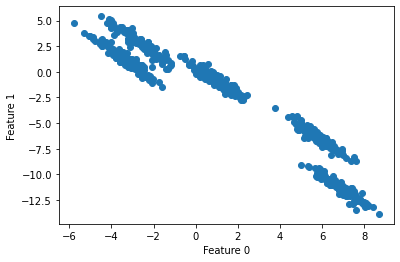

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


Text(0, 0.5, 'Feature 1')

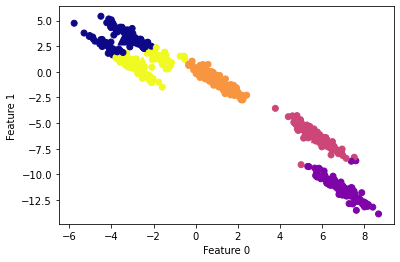

In [2]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

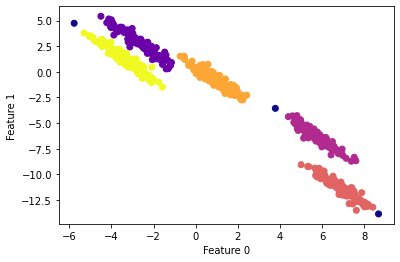

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



In [4]:
#k-means performance:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI =", adjusted_rand_score(y, y_pred))
ARI = 0.76#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters))
ARI = 0.99


ARI = 0.7614628725094053
ARI = 0.9936844336049284
